In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import first
import thinkstats2
import thinkplot

PART 2

I am going to answer that "Does the high of the basketball player effect the a mount of time played in match game ?"

In [3]:
df1 = pd.read_csv('basketball_player_allstar.csv')

In [4]:
df2 = pd.read_csv('basketball_master.csv')

In [5]:
player_id = df1['player_id'].dropna()

In [6]:
play_min = df1['minutes'].dropna()

In [7]:
height = df2['height'].dropna()

In [8]:
bio_id = df2['bioID'].dropna()

In [9]:
print('Describe of player id')
print(player_id.describe())
print('-----------')
print('Describe of how many minutes')
print(play_min.describe())
print('Describe of player height')
print(height.describe())
print('-----------')
print('Describe of players bio ID')
print(bio_id.describe())

Describe of player id
count          1609
unique          450
top       abdulka01
freq             19
Name: player_id, dtype: object
-----------
Describe of how many minutes
count    1609.000000
mean       23.103170
std        15.221598
min         0.000000
25%        16.000000
50%        21.000000
75%        27.000000
max        99.000000
Name: minutes, dtype: float64
Describe of player height
count    5049.000000
mean       74.255100
std        15.306748
min         0.000000
25%        74.000000
50%        77.000000
75%        80.000000
max        91.000000
Name: height, dtype: float64
-----------
Describe of players bio ID
count          5062
unique         5062
top       johnsma03
freq              1
Name: bioID, dtype: object


PART 3

Histogram,PMF and CDF

No handlers could be found for logger "matplotlib.legend"


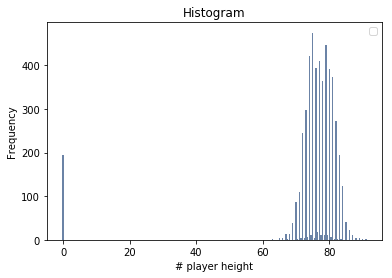

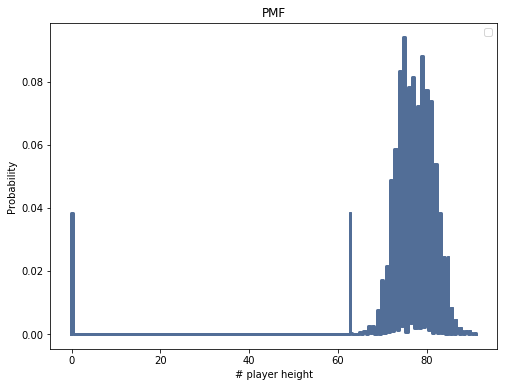

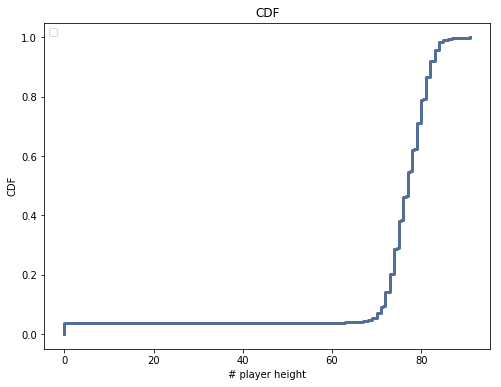

In [10]:
hist1 = thinkstats2.Hist(height)
thinkplot.Hist(hist1)
thinkplot.Show(xlabel='# player height', ylabel='Frequency',title='Histogram')


pmf1 = thinkstats2.Pmf(height)
thinkplot.Pmf(pmf1)
thinkplot.Show(xlabel='# player height', ylabel='Probability',title='PMF')


cdf1 = thinkstats2.Cdf(height)
thinkplot.Cdf(cdf1)
thinkplot.Show(xlabel='# player height', ylabel='CDF', loc='upper left',title='CDF')

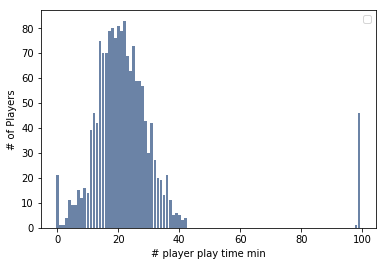

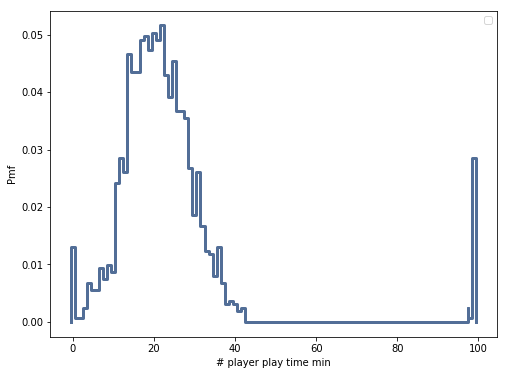

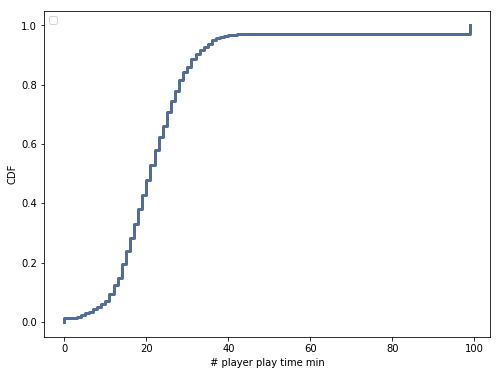

In [11]:
hist2 = thinkstats2.Hist(play_min)
thinkplot.Hist(hist2)
thinkplot.Show(xlabel='# player play time min', ylabel='# of Players')


pmf2 = thinkstats2.Pmf(play_min)
thinkplot.Pmf(pmf2)
thinkplot.Show(xlabel='# player play time min', ylabel='Pmf')


cdf2 = thinkstats2.Cdf(play_min)
thinkplot.Cdf(cdf2)
thinkplot.Show(xlabel='# player play time min', ylabel='CDF', loc='upper left')

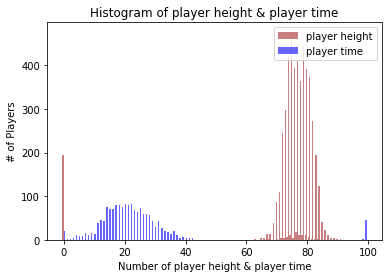

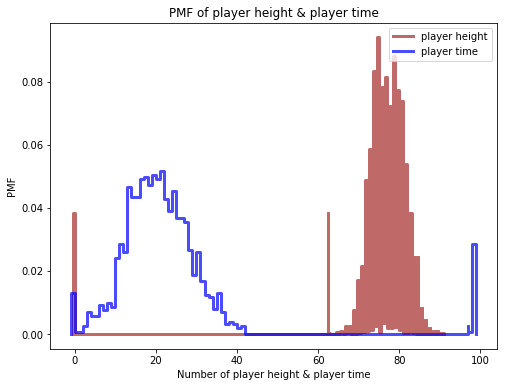

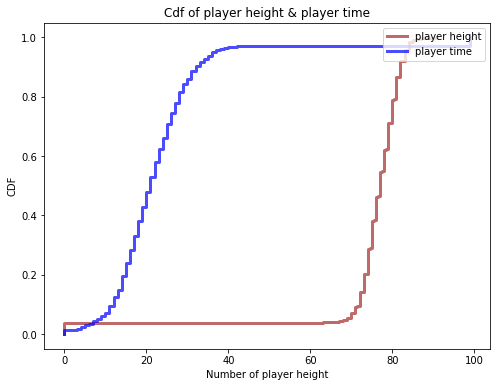

In [12]:
hist1 = thinkstats2.Hist(height,label="player height")
hist2 = thinkstats2.Hist(play_min,label="player time")
thinkplot.Hist(hist1, color='Brown', width=0.45, align='right')
thinkplot.Hist(hist2, color='Blue', width=0.45, align='left') 
thinkplot.Show(xlabel='Number of player height & player time', ylabel='# of Players' ,loc='upper right', title='Histogram of player height & player time')

hist1 = thinkstats2.Pmf(height,label="player height")
hist2 = thinkstats2.Pmf(play_min,label="player time")
thinkplot.PrePlot(2)
thinkplot.Pmf(hist1, color='Brown', align='right')
thinkplot.Pmf(hist2, color='Blue', align='right') 
thinkplot.Show(xlabel='Number of player height & player time', ylabel='PMF',loc='upper right',title='PMF of player height & player time')

hist1 = thinkstats2.Cdf(height)
hist2 = thinkstats2.Cdf(play_min)
thinkplot.Cdf(hist1, color='Brown',label="player height")
thinkplot.Cdf(hist2, color='Blue',label="player time") 
thinkplot.Show(xlabel='Number of player height', ylabel='CDF',loc='upper right',title='Cdf of player height & player time')

PART 4

In [14]:
mean_height, std_height = height.mean(), height.std()
mean_play_min, std_play_min = play_min.mean(), play_min.std()

print ('mean of height: '+ str(mean_height) +', std of height: ' + str(std_height))
print ('mean of player play time: '+ str(mean_play_min) +', std of player play time: ' + str(std_play_min))


pdf1 = thinkstats2.NormalPdf(mean_height, std_height)
pdf2 = thinkstats2.NormalPdf(mean_play_min, std_play_min)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

median = Median(pdf1)
median1 = Median(pdf2)

print ('Median :'  + str(median))
print ('Median :'  + str(median1))

print ('Density of Pdf of height :' +str(pdf1.Density(mean_height+ std_height)))
print ('Density of Pdf of player play time :' +str(pdf2.Density(mean_play_min+ std_play_min)))

mean of height: 74.2551000198, std of height: 15.3067481673
mean of player play time: 23.1031696706, std of player play time: 15.2215984983
Median :74.25510001980591
Median :23.10316967060286
Density of Pdf of height :0.015808107762339516
Density of Pdf of player play time :0.015896538365972716


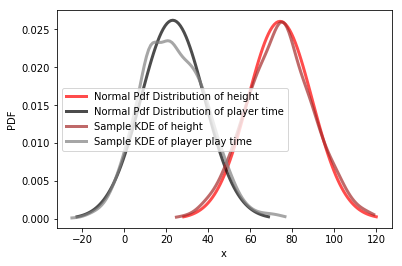

In [36]:
thinkplot.Pdf(pdf1, label='Normal Pdf Distribution of height',color='red')
thinkplot.Pdf(pdf2, label='Normal Pdf Distribution of player time',color='black')

sample = np.random.normal(mean_height, std_height, 1000)
sample1 = np.random.normal(mean_play_min, std_play_min, 1000)

sample_pdf = thinkstats2.EstimatedPdf(sample)
sample_pdf1 = thinkstats2.EstimatedPdf(sample1)

thinkplot.Pdf(sample_pdf, label='Sample KDE of height',color='brown')
thinkplot.Pdf(sample_pdf1, label='Sample KDE of player play time',color='gray')

thinkplot.Show(xlabel='x', ylabel='PDF')

In [37]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

median = Median(pdf1)
median1 = Median(pdf2)
print ('Median :'  + str(median))
print ('Median :'  + str(median1))

Median :74.25510001980591
Median :23.10316967060286


PART 5

In [38]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [39]:
Cov(height, play_min)*100

ValueError: shapes (5049,) and (1609,) not aligned: 5049 (dim 0) != 1609 (dim 0)

ValueError: x and y must be the same size

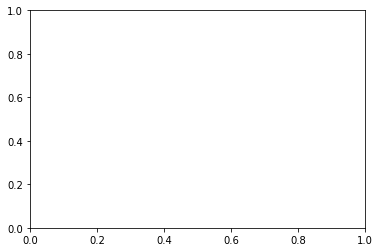

In [41]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

heights = Jitter(height, 0.3)
weights = Jitter(play_min, 0.3)

thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='height',
                 ylabel='play time',                 
                 legend=False)

PART 6

In [42]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

0.0


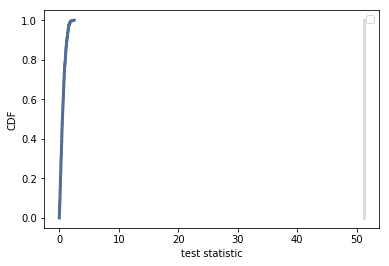

In [43]:
data = height.values, play_min.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print (pvalue)
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic', ylabel='CDF')